# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [251]:
import pandas as pd

# Reading Dataset
url = '/Users/bilaldilbar/Documents/GeorgeBrown/Sem1/AASD4000/Assignments/Task 5/Covid Analysis Dataset/01-10-2021.csv'
covid_data = pd.read_csv(url, sep = ',')

covid_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-11 05:21:50,33.93911,67.709953,53489,2277,43948,7264,Afghanistan,137.403749,4.256950
1,NaN,NaN,NaN,Albania,2021-01-11 05:21:50,41.15330,20.168300,63595,1241,37648,24706,Albania,2209.847800,1.951411
2,NaN,NaN,NaN,Algeria,2021-01-11 05:21:50,28.03390,1.659600,102144,2807,69212,30125,Algeria,232.934026,2.748081
3,NaN,NaN,NaN,Andorra,2021-01-11 05:21:50,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-11 05:21:50,-11.20270,17.873900,18193,416,13872,3905,Angola,55.354627,2.286594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,NaN,NaN,Unknown,Ukraine,2021-01-11 05:21:50,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4008,NaN,NaN,NaN,Nauru,2021-01-11 05:21:50,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4009,NaN,NaN,Niue,New Zealand,2021-01-11 05:21:50,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4010,NaN,NaN,NaN,Tuvalu,2021-01-11 05:21:50,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [216]:
# Top 5 rows
covid_data.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-11 05:21:50,33.93911,67.709953,53489,2277,43948,7264,Afghanistan,137.403749,4.256950
1,NaN,NaN,NaN,Albania,2021-01-11 05:21:50,41.15330,20.168300,63595,1241,37648,24706,Albania,2209.847800,1.951411
2,NaN,NaN,NaN,Algeria,2021-01-11 05:21:50,28.03390,1.659600,102144,2807,69212,30125,Algeria,232.934026,2.748081
3,NaN,NaN,NaN,Andorra,2021-01-11 05:21:50,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-11 05:21:50,-11.20270,17.873900,18193,416,13872,3905,Angola,55.354627,2.286594


#### Show the information of the dataset

In [217]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            4012 non-null   int64  
 10  Active               4012 non-null   int64  
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.9+ KB


#### Show the sum of missing values of features in the dataset

In [218]:
# Missing Values
missing_val = covid_data.isna().sum()

missing_val

FIPS                   747
Admin2                 742
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     49
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [219]:
# Number Of Confirmed Cases
country_cases = covid_data.groupby('Country_Region')['Confirmed'].sum().reset_index()

country_cases

,Country_Region,Confirmed
0,Afghanistan,53489
1,Albania,63595
2,Algeria,102144
3,Andorra,8586
4,Angola,18193
...,...,...
195,West Bank and Gaza,147400
196,Winter Olympics 2022,0
197,Yemen,2104
198,Zambia,27728


#### Show the number of Deaths by Country

In [220]:
# Number Of Deaths
country_deaths = covid_data.groupby('Country_Region')['Deaths'].sum().reset_index()

country_deaths

,Country_Region,Deaths
0,Afghanistan,2277
1,Albania,1241
2,Algeria,2807
3,Andorra,85
4,Angola,416
...,...,...
195,West Bank and Gaza,1604
196,Winter Olympics 2022,0
197,Yemen,611
198,Zambia,469


#### Show the number of Recovered cases by Country

In [221]:
# Number Of Recovered cases
country_recovered = covid_data.groupby('Country_Region')['Recovered'].sum().reset_index()

country_recovered

,Country_Region,Recovered
0,Afghanistan,43948
1,Albania,37648
2,Algeria,69212
3,Andorra,7724
4,Angola,13872
...,...,...
195,West Bank and Gaza,131117
196,Winter Olympics 2022,0
197,Yemen,1407
198,Zambia,20598


#### Show the number of Active Cases by Country

In [222]:
# Number Of Active cases
country_active = covid_data.groupby('Country_Region')['Active'].sum().reset_index()

country_active

,Country_Region,Active
0,Afghanistan,7264
1,Albania,24706
2,Algeria,30125
3,Andorra,777
4,Angola,3905
...,...,...
195,West Bank and Gaza,14679
196,Winter Olympics 2022,0
197,Yemen,86
198,Zambia,6661


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [223]:
# Latest Number Of Cases Country-Wise
country_latest = covid_data.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

country_latest

/var/folders/n_/5p32zr4901jbbndzhwqnmzg80000gn/T/ipykernel_14093/3764292758.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,53489,2277,43948,7264
1,Albania,63595,1241,37648,24706
2,Algeria,102144,2807,69212,30125
3,Andorra,8586,85,7724,777
4,Angola,18193,416,13872,3905
...,...,...,...,...,...
195,West Bank and Gaza,147400,1604,131117,14679
196,Winter Olympics 2022,0,0,0,0
197,Yemen,2104,611,1407,86
198,Zambia,27728,469,20598,6661


### Question 3

### Show the countries with no recovered cases

In [224]:
# Countries With No Recoveries
countries_with_no_recovery = covid_data.query('Recovered == 0')

countries_with_no_recovery[['Country_Region','Recovered']]

,Country_Region,Recovered
9,Australia,0
23,Belgium,0
24,Belgium,0
25,Belgium,0
26,Belgium,0
...,...,...
4007,Ukraine,0
4008,Nauru,0
4009,New Zealand,0
4010,Tuvalu,0


#### Show the countries with no confirmed cases

In [210]:
# Countries With No Confirmed Cases
countries_with_no_confirmed = covid_data.query('Confirmed == 0')
countries_with_no_confirmed = countries_with_no_confirmed.drop_duplicates(subset='Country_Region')

countries_with_no_confirmed[['Country_Region','Confirmed']]

,Country_Region,Confirmed
78,Canada,0
282,India,0
395,Malaysia,0
434,Mexico,0
635,Spain,0
725,US,0
3985,United Kingdom,0
4006,Winter Olympics 2022,0
4010,"Korea, North",0
4011,Ukraine,0


#### Show the countries with no deaths

In [225]:
# Countries With No Deaths
countries_with_no_deaths = covid_data.query('Deaths == 0')
countries_with_no_deaths = countries_with_no_deaths.drop_duplicates(subset='Country_Region')

countries_with_no_deaths[['Country_Region','Deaths']]

,Country_Region,Deaths
10,Australia,0
23,Belgium,0
74,Cambodia,0
79,Canada,0
127,China,0
174,Colombia,0
188,Denmark,0
192,Dominica,0
209,France,0
235,Germany,0


In [242]:
# Countries With No Deaths
countries_data = covid_data.query('(Deaths == 0) and (Confirmed > 0) and (Recovered > 0)')
countries_data = countries_data.drop_duplicates(subset='Country_Region')

countries_data[['Country_Region','Confirmed', 'Deaths', 'Recovered']]

,Country_Region,Confirmed,Deaths,Recovered
10,Australia,90,0,71
74,Cambodia,391,0,371
79,Canada,13,0,13
127,China,687,0,684
188,Denmark,29,0,28
192,Dominica,106,0,98
209,France,40,0,40
244,Holy See,27,0,15
349,Japan,224,0,205
368,Laos,41,0,40


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [243]:
# Top 10 Countries With Confirmed Cases
top_countries_confirmed = covid_data.sort_values(by='Confirmed', ascending=False).head(10)
countries_list = top_countries_confirmed[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered']]
countries_list.set_index('Country_Region', inplace=True)

countries_list

,Last_Update,Confirmed,Deaths,Recovered
Country_Region,,,,
France,2021-01-10 05:22:12,2762120,67229,178036
United Kingdom,2021-01-10 05:22:12,2613838,88347,0
Turkey,2021-01-10 05:22:12,2317118,22631,2190047
India,2021-01-10 05:22:12,1965556,50027,1861400
Argentina,2021-01-10 05:22:12,1714409,44417,1504330
Brazil,2021-01-10 05:22:12,1540513,48298,1350513
Poland,2021-01-10 05:22:12,1376389,31011,1113738
Iran,2021-01-10 05:22:12,1280438,56100,1067466
South Africa,2021-01-10 05:22:12,1214176,32824,956712


#### Show the Top 10 Countries with Active cases

In [244]:
# Top 10 Countries With Active Cases
active_countries_confirmed = covid_data.sort_values(by='Active', ascending=False).head(10)
countries_list = active_countries_confirmed[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
countries_list.set_index('Country_Region', inplace=True)

countries_list

,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
United Kingdom,2021-01-10 05:22:12,2613838,88347,0,2543297
France,2021-01-10 05:22:12,2762120,67229,178036,2516855
US,2021-01-10 05:22:12,907077,12090,0,894987
Peru,2021-01-10 05:22:12,454697,42786,0,411911
US,2021-01-10 05:22:12,415991,8219,0,407772
US,2021-01-10 05:22:12,374740,5767,0,368973
Spain,2021-01-10 05:22:12,421295,11971,40736,368588
Serbia,2021-01-10 05:22:12,356125,3513,0,352612
Spain,2021-01-10 05:22:12,386595,8828,26203,351564


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Total Deaths(>50000), Confirmed, Recovered & Active Cases By Country')

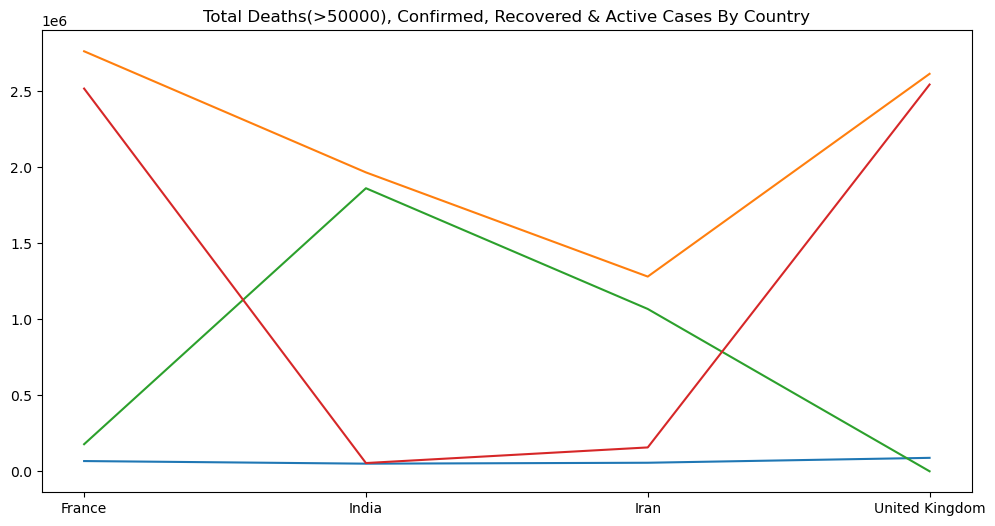

In [245]:
# Plotting
high_deaths_countries = covid_data.query('Deaths > 50000')

plt.figure(figsize=(12, 6))
plt.plot(high_deaths_countries['Country_Region'], high_deaths_countries['Deaths'], label='Deaths')
plt.plot(high_deaths_countries['Country_Region'], high_deaths_countries['Confirmed'], label='Confirmed')
plt.plot(high_deaths_countries['Country_Region'], high_deaths_countries['Recovered'], label='Recovered')
plt.plot(high_deaths_countries['Country_Region'], high_deaths_countries['Active'], label='Active')

plt.title('Total Deaths(>50000), Confirmed, Recovered & Active Cases By Country')

### Question 6

### Plot Province/State wise Deaths in USA

In [18]:
import plotly.express as px

In [231]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [232]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [249]:
# Province/State Wise Deaths In USA
usa_data = covid_data[covid_data['Country_Region'] == 'US']

fig = px.line(usa_data, x='Province_State', y='Deaths', title='Province/State Wise Deaths In USA')
fig.update_xaxes(title_text='Province_State')
fig.update_yaxes(title_text='Total Deaths')
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [248]:
# Province/State Wise Active Cases In USA
fig = px.line(usa_data, x='Province_State', y='Active', title='Province/State Wise Active Cases In USA')
fig.update_xaxes(title_text='Province_State')
fig.update_yaxes(title_text='Active Cases')
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [235]:
# Province/State Wise Confirmed Cases In USA
fig = px.line(usa_data, x='Province_State', y='Confirmed', title='Province/State Wise Confirmed Cases In USA')
fig.update_xaxes(title_text='Province_State')
fig.update_yaxes(title_text='Confirmed Cases')
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [24]:
import plotly.express as px
import plotly.io as pio

In [236]:
# Worldwide Confirmed Cases
fig = px.line(covid_data, x='Last_Update', y='Confirmed', title='Worldwide Confirmed Cases Over Time')
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Confirmed Cases')
fig.show()